In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [4]:
X, y = make_moons(n_samples=500, noise = 0.2, random_state=42)

In [5]:
X

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

In [6]:
X[:,0]

array([ 0.83085779,  0.99170955,  1.1072453 , -0.14089918,  0.40559217,
        1.28895069,  1.12079473,  0.10659373,  0.5201985 ,  1.70590095,
        1.01561986, -0.52269871,  1.69803483,  0.24138782,  1.34611143,
        1.27539204,  1.98071107,  0.93936686,  0.66278858,  1.7323556 ,
        1.92000739,  2.20364555, -0.2360311 ,  0.99757645,  0.4490658 ,
        1.82205882,  1.69068186, -0.80884507,  0.25212963,  0.34031402,
        1.99488555,  0.24499925,  2.09823231, -0.55642286,  0.9479981 ,
        0.39891155,  1.10533435,  0.84683651, -0.93880614,  0.7376266 ,
        1.38487395, -0.08086902,  1.78057213, -0.83618992,  0.7997286 ,
        0.88209598,  1.12951162,  1.15841901,  1.38108492,  0.79233728,
        0.10213005, -1.04283525, -0.11553171,  1.33868766, -0.85498628,
        0.58929371, -0.21878872,  0.79921038, -1.04055471,  0.31177723,
        1.84662963, -0.25368264,  0.29602029,  1.85062903,  0.24013589,
        0.85680532,  1.97821104,  0.58991118, -0.71046545,  1.27

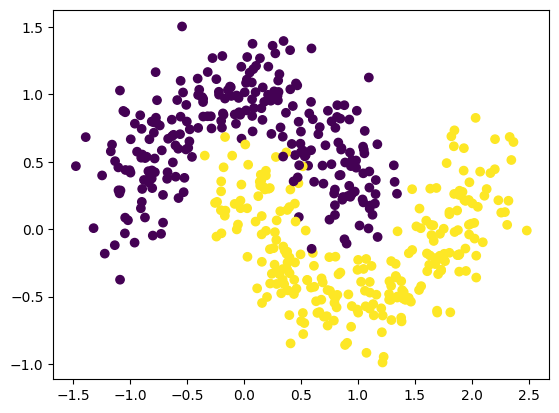

In [14]:
plt.scatter(X[:, 0], X[:,1], c=y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

log_clf =  LogisticRegression()
log_clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap='Greys', alpha=0.8 * alpha)

    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")

    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle='none')

    plt.axis(axes) # type: ignore
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

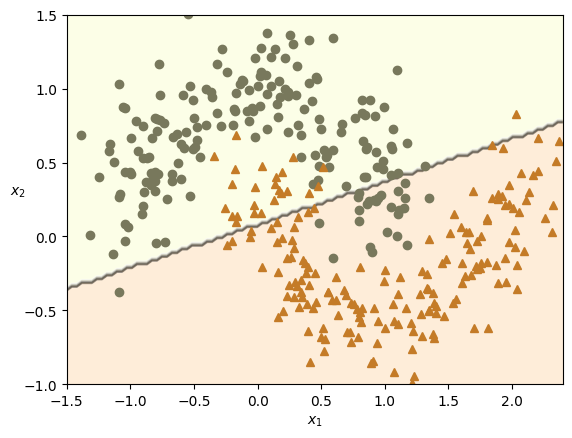

In [31]:
plot_decision_boundary(log_clf, X_train, y_train, alpha=0.5)

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('svc', SVC()),
        ('tree', DecisionTreeClassifier(max_depth=5))


    ]
)
voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('svc', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [ ]:
voting_clf.estimators

[('lr', LogisticRegression()),
 ('svc', SVC()),
 ('tree', DecisionTreeClassifier(max_depth=5))]

In [40]:
voting_clf.named_estimators_['lr'].score(X_test, y_test)

0.856

In [41]:
for name, clf in voting_clf.named_estimators_.items():
    print(f"{name}: {clf.score(X_test, y_test):.3f}" )

lr: 0.856
svc: 0.968
tree: 0.968


In [42]:
voting_clf.score(X_test, y_test)

0.968

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('svc', SVC(probability=True)),
        ('tree', DecisionTreeClassifier(max_depth=5)),
   ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('svc', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [10]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, '=', clf.predict_proba(X_test[:1]))

lr = [[0.44804806 0.55195194]]
svc = [[0.06881494 0.93118506]]
tree = [[0. 1.]]


In [15]:
n=10
print("Voting clf = ", voting_clf.predict(X_test[:n]))

for name, clf in voting_clf.named_estimators_.items():
    print(f'{name:>12}', '=', clf.predict(X_test[:n]))

Voting clf =  [1 1 1 1 1 1 0 0 0 0]
          lr = [1 0 0 1 1 1 0 0 0 0]
         svc = [1 1 1 1 1 1 0 0 0 0]
        tree = [1 1 1 1 1 1 0 0 0 0]


## Bagging classifier

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
 
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100
)

tree_clf = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(
    n_estimators=500
)

In [43]:
bag_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
bag_clf.score(X_test, y_test)
tree_clf.score(X_test, y_test)

0.968

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.984

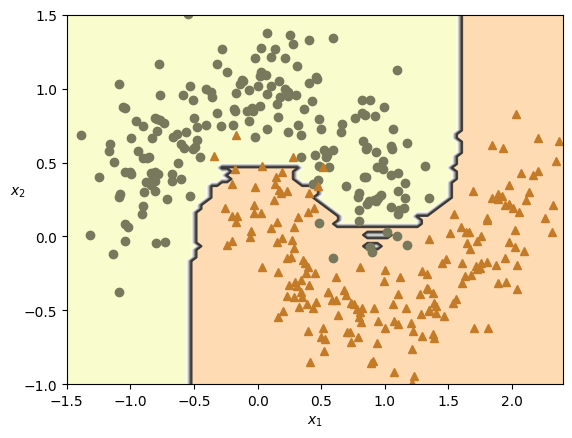

In [46]:
plot_decision_boundary(bag_clf, X_train, y_train)

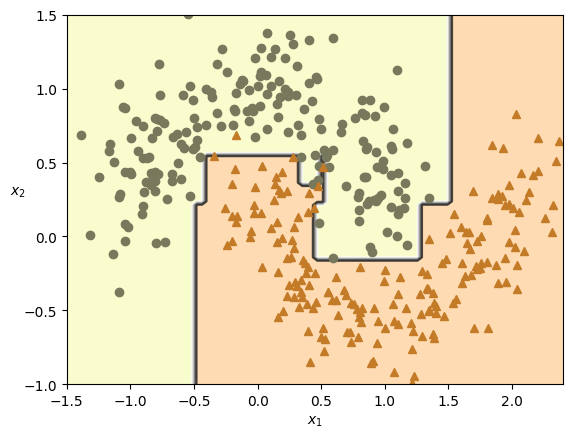

In [47]:
plot_decision_boundary(tree_clf, X_train, y_train)

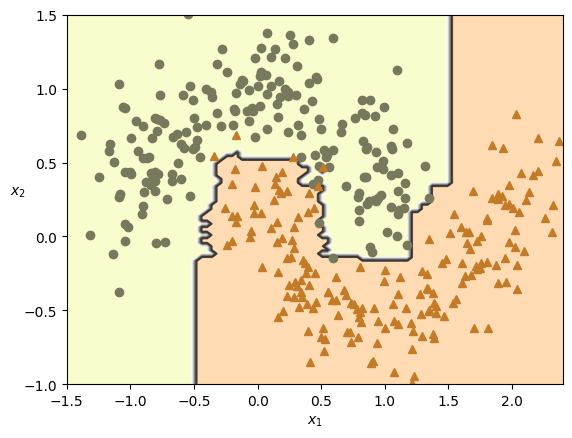

In [48]:
plot_decision_boundary(forest_clf, X_train, y_train)

### Feature importances

In [49]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [62]:
from sklearn.datasets import fetch_openml
X, y =fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [63]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
rnd_clf.feature_importances_

array([0.441668, 0.558332])